# NOTES
# Objective: F1 = 50% and Precision = 70%
## Shape Analysis
- Target: 'FraudResult' 
- Shape: (95,662, 16) 
- Variable types: 11 objects, 4 integers, and 1 float
- There are no missing values in the dataset
## Content Analysis
- Target visualization  
- Dataset is highly imbalanced, with only 0.2% fraud cases
  - Meaning of variables
- countrycode and currency code each have only one modality, so they will be dropped  
- The most purchased product/service is product_Id6; the most frequent distribution channel is channelId_3; the most common product category is financial services; there is also a minority category called other; the most applied pricing strategy is 2  
- For the date variable, both date and time are included → segmentation is needed for better readability  
- A large proportion of transactions occur in the morning and afternoon; mule accounts may be hidden there  
- There are many transactions on Monday, Tuesday, and Friday; in the 8th month, transactions are more frequent, especially around 16:00 (4:00–4:59 PM)  
    - Variable/Target relationship  
- For service providers 6, 4, and 2, there are almost no fraud cases, unlike the others. Fraud cases may be linked to the service provider  
- On productID 15, fraud cases appear, mostly related to financial services and distribution channel 3  
- Value and amount discriminate between fraud and non-fraud cases, as do time, time slots, day of week, day of month, week of year, and strategy. The higher the strategy level, the fewer the fraud cases  
## More Detailed Analysis   
- Variable/Variable relationship  
- Transport and tickets involve large expenses. But for transport, the confidence interval is very wide, indicating high variability. Everyday services (airtime, utility_bill, data_bundles) involve smaller amounts, same as the Value variable  
- All product category classes, except “other,” contain outliers  
- Channels ID 3 and 1 are associated with higher transaction amounts compared to 1 and 5  
### Null Hypotheses (H0):  
- Time slots, hour, day of week, day of month, service provider, distribution channel, productID, service type, amount, value, and strategy may all be factors that distinguish fraud from non-fraud cases  
    - H0 = All the variables above show no difference between fraudulent and legitimate transactions  
    - H0 = Amounts and values are not different depending on transaction legitimacy  
#### The Chi-squared test accepted: day of week, week of year, isweekend; it rejected time slot.  
#### The Student’s t-test rejected independence between value/amount and the nature of the transaction.  
## Correlation
- Value and Amount are highly correlated

## Shape analysis

In [1]:
#Importation
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("C:\\Users\\karel\\OneDrive\\Bureau\\ISEP1\\AUTRES ISEP1\\ML\\Projets\\Zindi_Fraude\\training.csv")
df=dataset.copy()

In [3]:
pd.set_option('display.max_rows',111)
pd.set_option('display.max_columns',df.shape[1])
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [9]:
df.columns 

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [13]:
df.shape

(95662, 16)

In [15]:
df.dtypes.value_counts()

object     11
int64       4
float64     1
Name: count, dtype: int64

<Axes: >

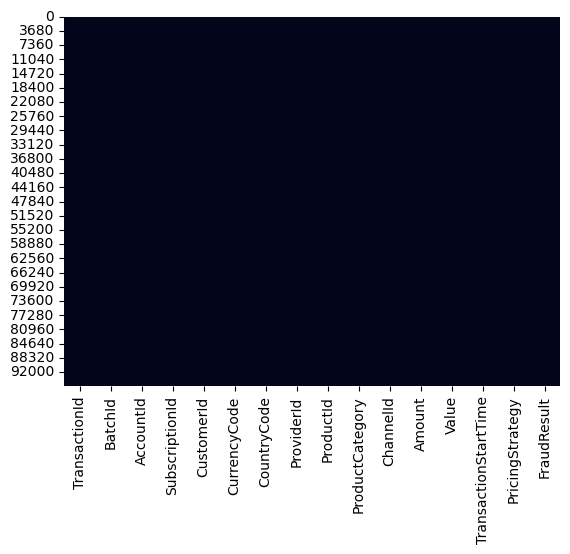

In [18]:
#Valeurs manquantes 
sns.heatmap(df.isna(),cbar=False)

## Content analysis

In [19]:
#Visualisation de la target
df['FraudResult'].value_counts(normalize=True)

FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64

In [8]:
#Comprendre les variables quali
for var in df.select_dtypes('object'):
    print(df[var].value_counts(normalize=True)) 
    print("------------------------")



TransactionId
TransactionId_76871     0.00001
TransactionId_74922     0.00001
TransactionId_2737      0.00001
TransactionId_28101     0.00001
TransactionId_33267     0.00001
                         ...   
TransactionId_32860     0.00001
TransactionId_139405    0.00001
TransactionId_65784     0.00001
TransactionId_8889      0.00001
TransactionId_35670     0.00001
Name: proportion, Length: 95662, dtype: float64
------------------------
BatchId
BatchId_67019     0.000293
BatchId_51870     0.000167
BatchId_113893    0.000146
BatchId_127204    0.000125
BatchId_116835    0.000105
                    ...   
BatchId_23939     0.000010
BatchId_104215    0.000010
BatchId_116411    0.000010
BatchId_36631     0.000010
BatchId_29317     0.000010
Name: proportion, Length: 94809, dtype: float64
------------------------
AccountId
AccountId_4841    0.322939
AccountId_4249    0.046591
AccountId_4840    0.018168
AccountId_3206    0.011551
AccountId_318     0.011185
                    ...   
AccountId_4

In [5]:
 df.select_dtypes('int').columns

Index(['CountryCode', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

In [ ]:
for col in df.select_dtypes(include='category').columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_clean, x=col)
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
df['CountryCode'].value_counts(normalize=True)

CountryCode
256    1.0
Name: proportion, dtype: float64

In [11]:
df['PricingStrategy'].value_counts(normalize=True)

PricingStrategy
2    0.834689
4    0.141770
1    0.019517
0    0.004025
Name: proportion, dtype: float64

In [3]:
df=df.drop(['CurrencyCode', 'CountryCode'],axis=1)

In [4]:
#création de variables temporelles
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['DayOfWeek'] = df['TransactionStartTime'].dt.dayofweek
df['WeekOfYear'] = df['TransactionStartTime'].dt.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])
df['Month'] = df['TransactionStartTime'].dt.month
df['Day'] = df['TransactionStartTime'].dt.day
df['Hour'] = df['TransactionStartTime'].dt.hour
df['Crénaux_horaire'] = pd.cut(df['Hour'], 
                       bins=[0, 6, 12, 18, 24], 
                       labels=['Nuit', 'Matin', 'Après-midi', 'Soir'])

In [21]:
df['Crénaux_horaire'].value_counts(normalize=True)

Crénaux_horaire
Après-midi    0.393920
Matin         0.358965
Nuit          0.136071
Soir          0.111044
Name: proportion, dtype: float64

In [22]:
#distributions suivants les jours de semaine 
df['DayOfWeek'].value_counts(normalize=True)

DayOfWeek
4    0.289728
1    0.157314
0    0.123738
3    0.115396
2    0.106960
5    0.105611
6    0.101252
Name: proportion, dtype: float64

In [24]:
#sitribution des transactions suivant les jours du mois 
df['Day'].value_counts(normalize=True)

Day
8     0.062689
28    0.049393
4     0.048776
25    0.047542
1     0.046612
11    0.043445
21    0.041093
18    0.040612
16    0.037653
7     0.036660
30    0.034235
23    0.032259
14    0.031454
27    0.030096
12    0.029845
19    0.028580
24    0.028172
22    0.028151
26    0.027806
15    0.026834
29    0.025486
3     0.023949
10    0.023635
20    0.023583
13    0.023175
5     0.022789
17    0.022590
6     0.022025
9     0.021116
31    0.020457
2     0.019287
Name: proportion, dtype: float64

In [25]:
#analyser comme 16=16hOO à 16h59
df['Hour'].value_counts(normalize=True)

Hour
16    0.076373
17    0.076216
18    0.066191
15    0.065700
11    0.065083
10    0.062574
7     0.059825
8     0.058947
9     0.056898
6     0.055665
12    0.055006
13    0.054609
14    0.054139
19    0.053647
5     0.043497
20    0.031632
4     0.024346
21    0.015461
3     0.007464
22    0.007140
2     0.003021
23    0.002969
1     0.001840
0     0.001756
Name: proportion, dtype: float64

In [5]:
#créer des datasets selon les groupes des features
identifiants=df[['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId']]
info_produits_et_services=df[['ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId']]
valeurs_financières=df[['Amount', 'Value']]
startégie=df['PricingStrategy']
heure=df['Hour']
jour_sem=df['DayOfWeek']
jour_mois=df['Day']
Crénaux_horaire=df['Crénaux_horaire']
semaine_année=df['WeekOfYear']
mois=df['Month']

In [9]:
#on crée des sous datasets des différentes catégories de la target
fraude=df[df['FraudResult']==1]
non_fraude=df[df['FraudResult']==0]

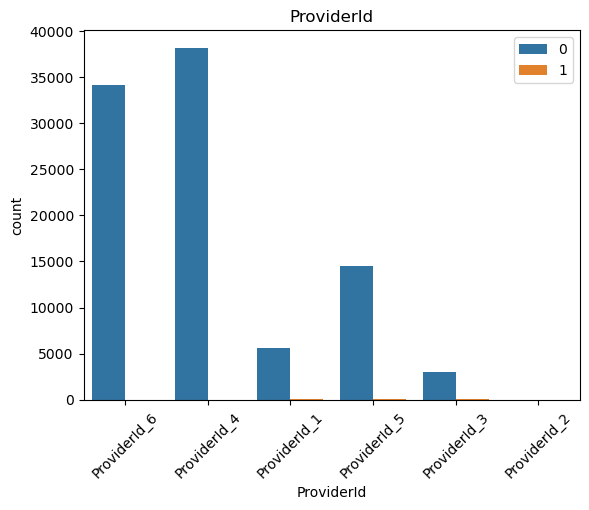

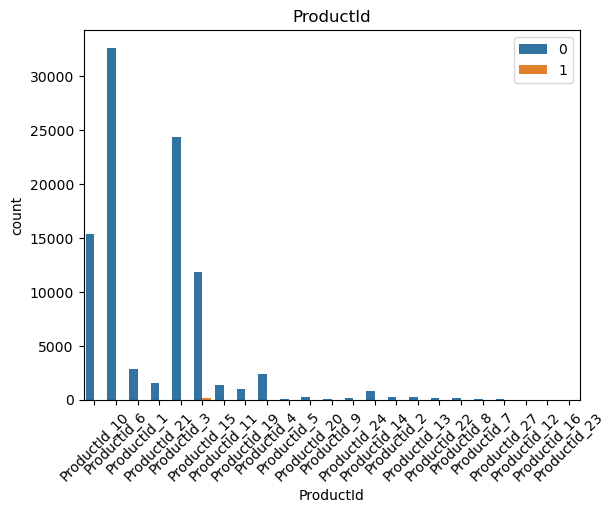

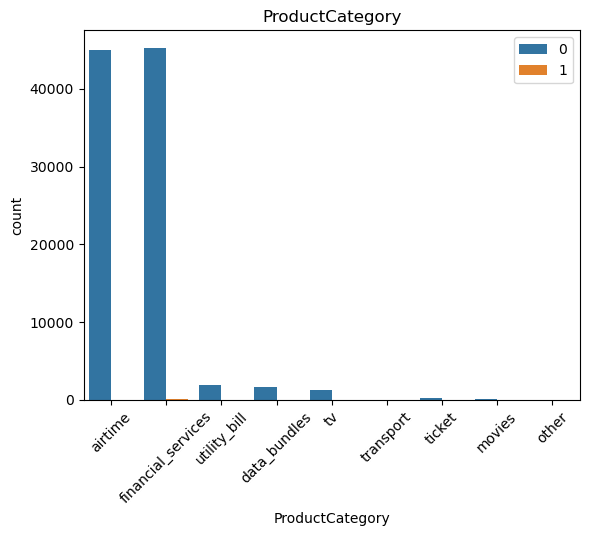

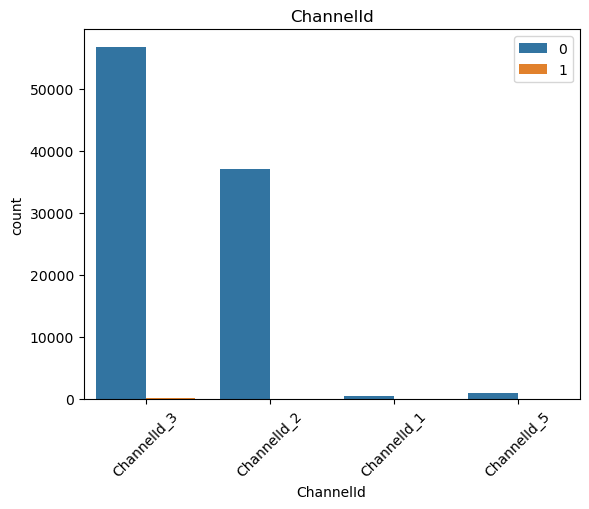

In [35]:
for var in info_produits_et_services.columns:
    plt.figure()
    sns.countplot(x=df[var], hue=df['FraudResult'],data=df )
    plt.title(var)
    plt.xticks(rotation=45)
    plt.legend()


C:\Users\karel\AppData\Local\Temp\ipykernel_2112\2103500721.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraude[var], label='Fraude')
C:\Users\karel\AppData\Local\Temp\ipykernel_2112\2103500721.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_fraude[var], label='Non_Fraude')
C:\Use

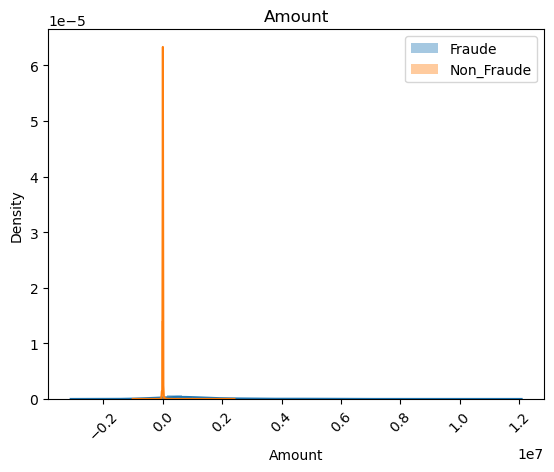

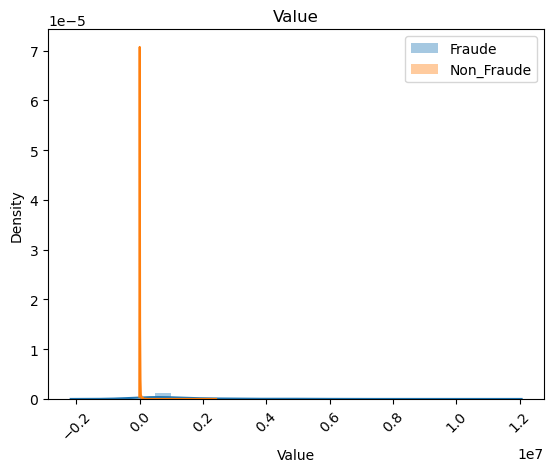

In [42]:
for var in df[['Amount', 'Value']].columns:
    plt.figure()
    sns.distplot(fraude[var], label='Fraude')
    sns.distplot(non_fraude[var], label='Non_Fraude')
    plt.title(var)
    plt.xticks(rotation=45)
    plt.legend()

<Axes: xlabel='Hour', ylabel='count'>

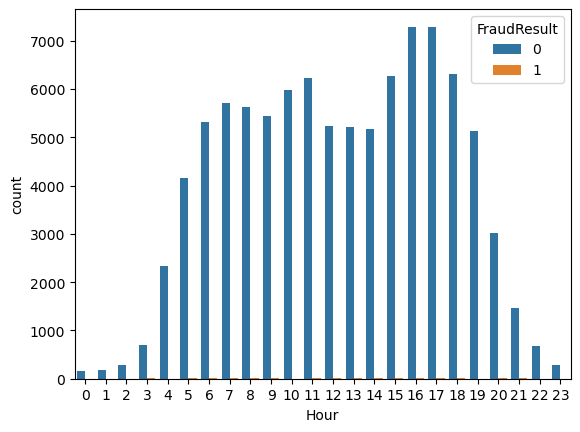

In [38]:
 sns.countplot(x=heure, hue=df['FraudResult'],data=df )

<Axes: xlabel='DayOfWeek', ylabel='count'>

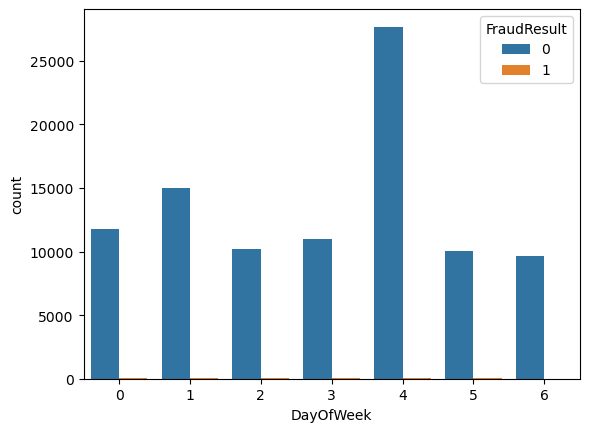

In [39]:
 sns.countplot(x=jour_sem, hue=df['FraudResult'],data=df )

<Axes: xlabel='Day', ylabel='count'>

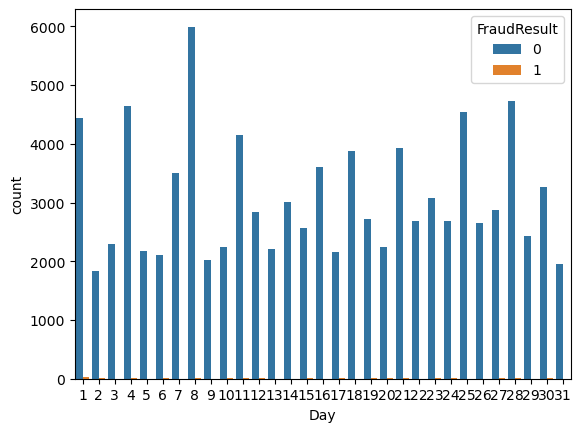

In [40]:
 sns.countplot(x=jour_mois, hue=df['FraudResult'],data=df )

<Axes: xlabel='Crénaux_horaire', ylabel='count'>

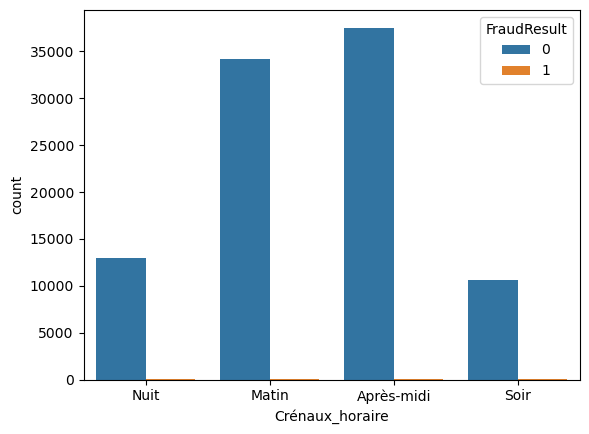

In [41]:
 sns.countplot(x=Crénaux_horaire, hue=df['FraudResult'],data=df )

<Axes: xlabel='PricingStrategy', ylabel='count'>

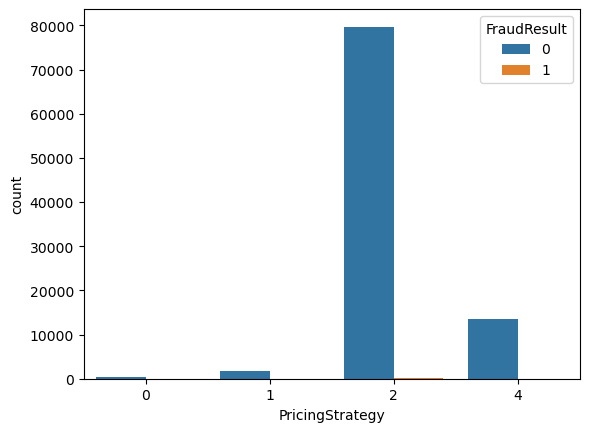

In [43]:
sns.countplot(x=startégie, hue=df['FraudResult'],data=df )

<Axes: xlabel='WeekOfYear', ylabel='count'>

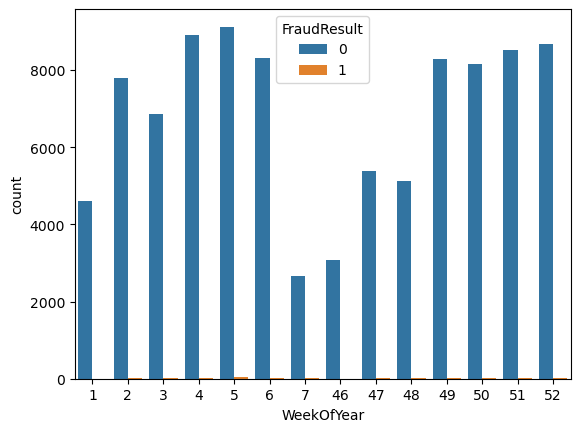

In [44]:
sns.countplot(x=semaine_année, hue=df['FraudResult'],data=df )

<Axes: xlabel='Month', ylabel='count'>

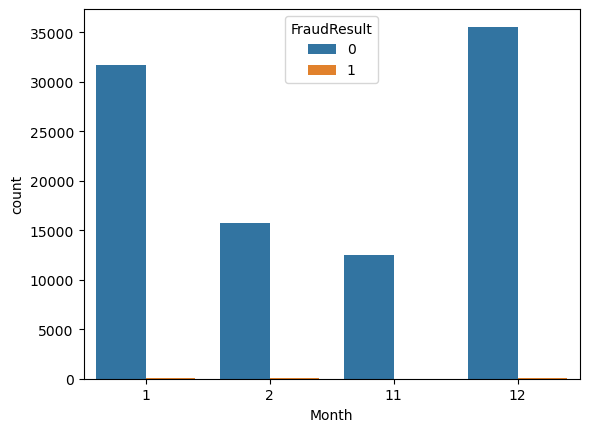

In [45]:
sns.countplot(x=mois, hue=df['FraudResult'],data=df )

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'ProviderId_6'),
  Text(1, 0, 'ProviderId_4'),
  Text(2, 0, 'ProviderId_1'),
  Text(3, 0, 'ProviderId_5'),
  Text(4, 0, 'ProviderId_3'),
  Text(5, 0, 'ProviderId_2')])

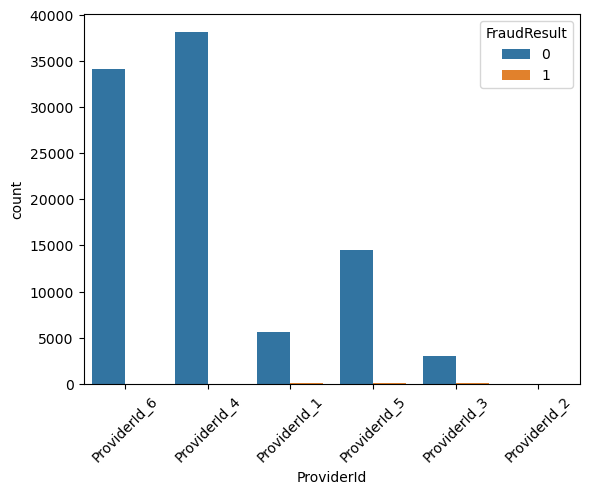

In [11]:
sns.countplot(x='ProviderId', hue=df['FraudResult'],data=df )
plt.xticks(rotation=45)

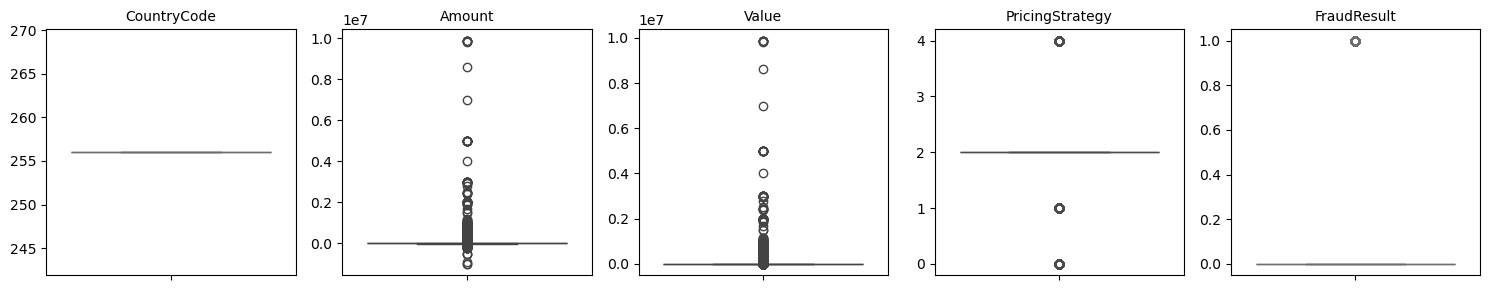

In [8]:
numeric_cols = df.select_dtypes(['int','float']).columns

palette = sns.color_palette("husl", len(numeric_cols))

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(3*len(numeric_cols), 3))
for i, var in enumerate(numeric_cols):
    sns.boxplot(y=df[var], ax=axes[i], color=palette[i])
    axes[i].set_title(var, fontsize=10)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


In [9]:
numeric_cols

Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

## More detailed analysis

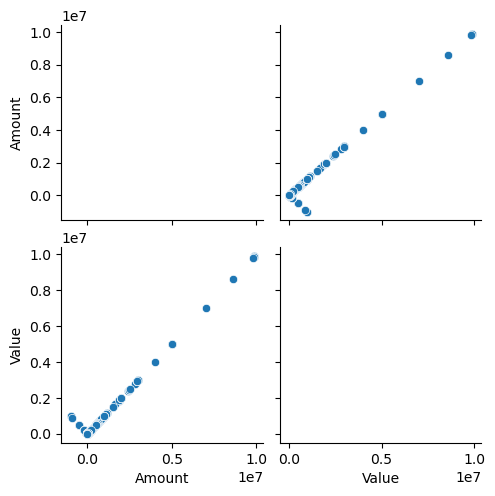

In [46]:
#relation variable quanti quanti
sns.pairplot(valeurs_financières)


<Figure size 640x480 with 0 Axes>

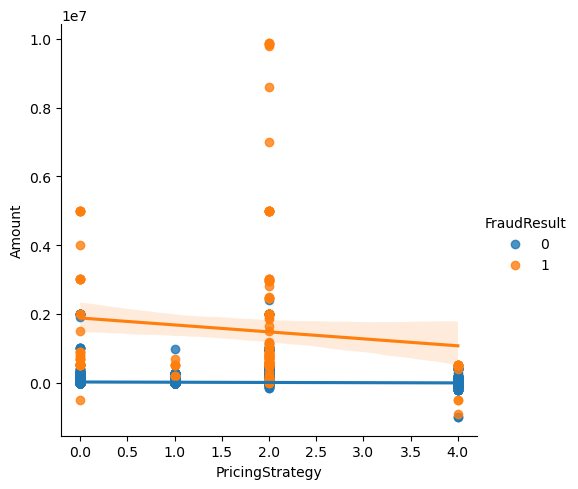

<Figure size 640x480 with 0 Axes>

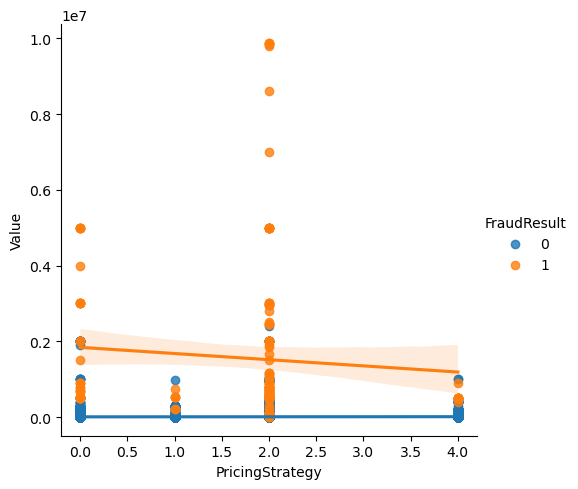

In [47]:
for col in valeurs_financières:
    plt.figure()
    sns.lmplot(x='PricingStrategy', y=col, hue='FraudResult', data=df)

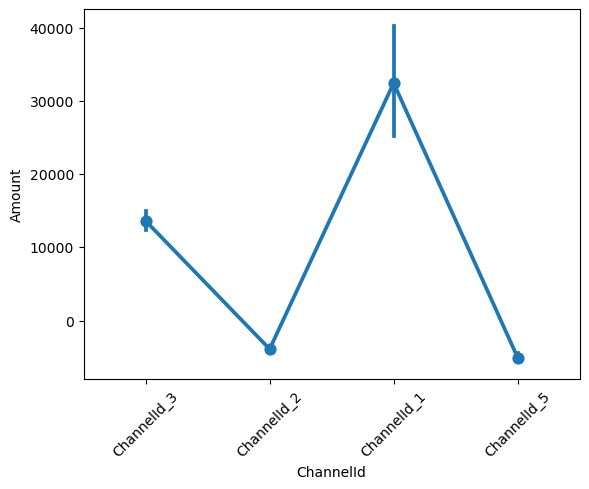

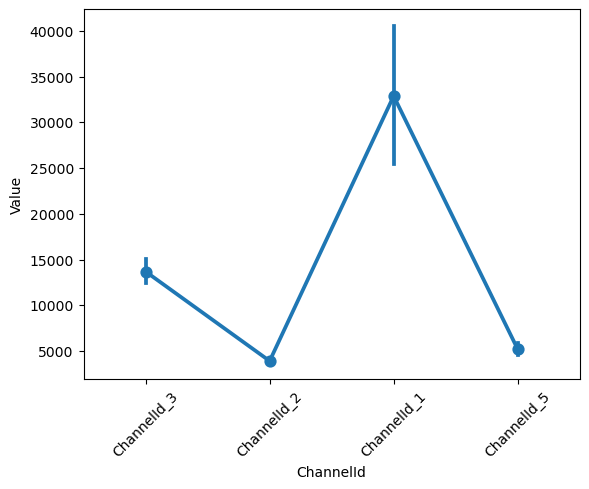

In [65]:
for col in valeurs_financières:
    plt.figure()
    sns.pointplot(data=df, x='ChannelId', y=col)
    plt.xticks(rotation=45)

In [ ]:
plt.figure()
sns.lmplot(x='ChannelId', y='Value', hue='FraudResult', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'airtime'),
  Text(1, 0, 'financial_services'),
  Text(2, 0, 'utility_bill'),
  Text(3, 0, 'data_bundles'),
  Text(4, 0, 'tv'),
  Text(5, 0, 'transport'),
  Text(6, 0, 'ticket'),
  Text(7, 0, 'movies'),
  Text(8, 0, 'other')])

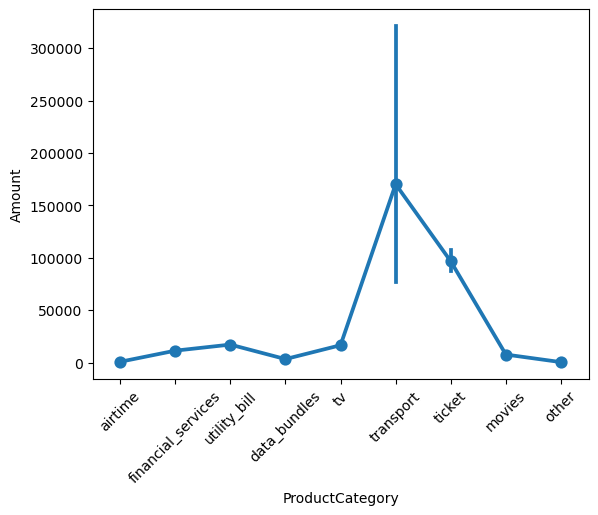

In [60]:
plt.figure()
sns.pointplot(data=df, x='ProductCategory', y='Amount')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'airtime'),
  Text(1, 0, 'financial_services'),
  Text(2, 0, 'utility_bill'),
  Text(3, 0, 'data_bundles'),
  Text(4, 0, 'tv'),
  Text(5, 0, 'transport'),
  Text(6, 0, 'ticket'),
  Text(7, 0, 'movies'),
  Text(8, 0, 'other')])

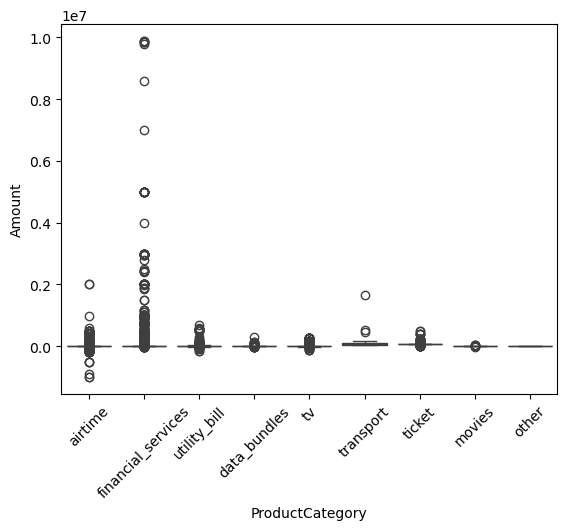

In [61]:
sns.boxplot(data=df, x='ProductCategory', y='Amount')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'airtime'),
  Text(1, 0, 'financial_services'),
  Text(2, 0, 'utility_bill'),
  Text(3, 0, 'data_bundles'),
  Text(4, 0, 'tv'),
  Text(5, 0, 'transport'),
  Text(6, 0, 'ticket'),
  Text(7, 0, 'movies'),
  Text(8, 0, 'other')])

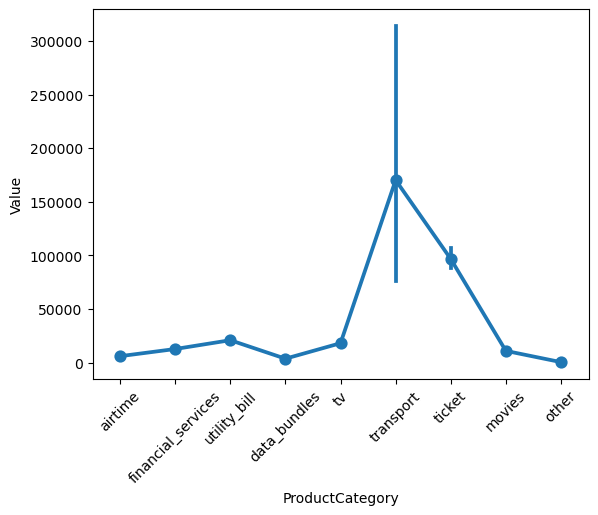

In [62]:
plt.figure()
sns.pointplot(data=df, x='ProductCategory', y='Value')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'airtime'),
  Text(1, 0, 'financial_services'),
  Text(2, 0, 'utility_bill'),
  Text(3, 0, 'data_bundles'),
  Text(4, 0, 'tv'),
  Text(5, 0, 'transport'),
  Text(6, 0, 'ticket'),
  Text(7, 0, 'movies'),
  Text(8, 0, 'other')])

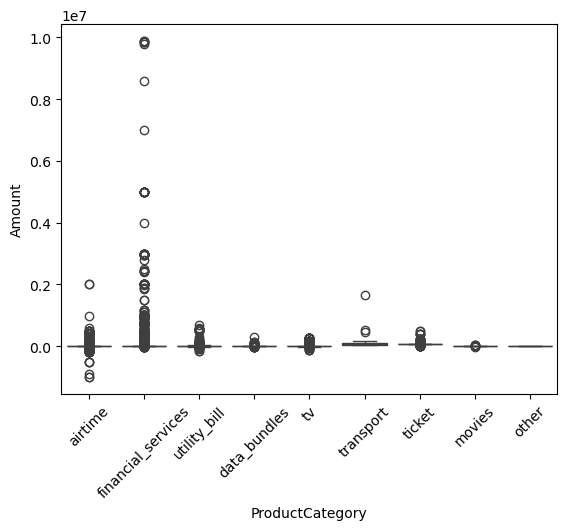

In [63]:
sns.boxplot(data=df, x='ProductCategory', y='Amount')
plt.xticks(rotation=45)

C:\Users\karel\AppData\Local\Temp\ipykernel_22896\2651080395.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Amount', hue='FraudResult', data=df, ci=None)


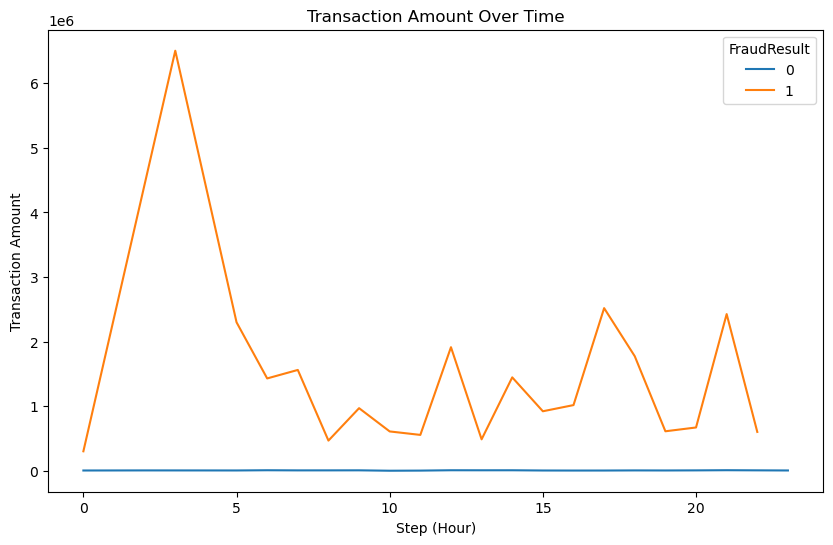

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Amount', hue='FraudResult', data=df, ci=None)
plt.title('Transaction Amount Over Time')
plt.xlabel('Step (Hour)')
plt.ylabel('Transaction Amount')
plt.show()

## Nuls hypothesis tests

In [21]:
#TEST DE CHI2
from scipy.stats import chi2_contingency
# Échantillonnage équilibré 
non_fraude = non_fraude.sample(fraude.shape[0])

def chi_square_test(col):
    """
    Test du Chi-carré pour variables qualitatives
    H0: Les variables sont indépendantes
    H1: Les variables sont dépendantes
    """
    alpha = 0.05
    
    # Créer un DataFrame combiné pour faciliter l'analyse
    combined_df = pd.concat([
        fraude[[col]].assign(group='Fraude'),
        non_fraude[[col]].assign(group='non_fraude')
    ])
    
    # Supprimer les valeurs manquantes
    combined_df = combined_df.dropna()
    
    # Vérifier s'il y a assez de données
    if len(combined_df) < 5:
        return 'Données insuffisantes'
    
    # Créer le tableau de contingence
    contingency_table = pd.crosstab(combined_df[col], combined_df['group'])
    
    # Vérifier si toutes les cellules ont au moins 5 observations (condition du Chi-carré)
    if (contingency_table < 5).any().any():
        return 'Conditions non respectées (cellules < 5)'
    
    # Effectuer le test du Chi-carré
    try:
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        if p_value < alpha:
            return f'H0 Rejetée (p={p_value:.4f})'
        else:
            return f'H0 Acceptée (p={p_value:.4f})'
            
    except Exception as e:
        return f'Erreur: {str(e)}'

# Test pour toutes les colonnes qualitatives
qualitative_columns =df.columns.drop(['Value', 'PricingStrategy', 'FraudResult','Amount'])

for col in qualitative_columns:
    result = chi_square_test(col)
    print(f'{col :-<50} {result}')

TransactionId------------------------------------- Conditions non respectées (cellules < 5)
BatchId------------------------------------------- Conditions non respectées (cellules < 5)
AccountId----------------------------------------- Conditions non respectées (cellules < 5)
SubscriptionId------------------------------------ Conditions non respectées (cellules < 5)
CustomerId---------------------------------------- Conditions non respectées (cellules < 5)
ProviderId---------------------------------------- Conditions non respectées (cellules < 5)
ProductId----------------------------------------- Conditions non respectées (cellules < 5)
ProductCategory----------------------------------- Conditions non respectées (cellules < 5)
ChannelId----------------------------------------- Conditions non respectées (cellules < 5)
TransactionStartTime------------------------------ Conditions non respectées (cellules < 5)
DayOfWeek----------------------------------------- H0 Rejetée (p=0.0014)
WeekOfY

In [14]:
df.select_dtypes('int').columns

Index(['Value', 'PricingStrategy', 'FraudResult', 'DayOfWeek', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [22]:
def adaptive_test(col):
    """
    Choisit automatiquement le test le plus approprié selon les conditions
    """
    alpha = 0.05
    
    # Créer un DataFrame combiné
    combined_df = pd.concat([
        fraude[[col]].assign(group='Fraude'),
        non_fraude[[col]].assign(group='non_fraude')
    ])
    
    # Supprimer les valeurs manquantes
    combined_df = combined_df.dropna()
    
    
    if len(combined_df) < 5:
        return 'Données insuffisantes'
    
    # Créer le tableau de contingence
    contingency_table = pd.crosstab(combined_df[col], combined_df['group'])
    
    # Stratégie adaptative
    min_expected = 5
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Vérifier les conditions
    conditions_ok = (expected >= min_expected).all().all()
    
    if conditions_ok:
        # Chi-carré classique
        if p_value < alpha:
            return f'H0 Rejetée Chi-carré (p={p_value:.4f})'
        else:
            return f'H0 Acceptée Chi-carré (p={p_value:.4f})'
    
    elif contingency_table.shape == (2, 2):
        # Test exact de Fisher pour 2x2
        try:
            odds_ratio, p_value = fisher_exact(contingency_table)
            if p_value < alpha:
                return f'H0 Rejetée Fisher (p={p_value:.4f})'
            else:
                return f'H0 Acceptée Fisher (p={p_value:.4f})'
        except:
            return 'Erreur Fisher'
    
    else:
        # Test G pour les autres cas
        try:
            return g_test_internal(contingency_table, alpha)
        except:
            return 'Conditions non respectées - Test impossible'
for col in qualitative_columns:
    result = adaptive_test(col)
    print(f'{col :-<50} {result}')

TransactionId------------------------------------- Conditions non respectées - Test impossible
BatchId------------------------------------------- Conditions non respectées - Test impossible
AccountId----------------------------------------- Conditions non respectées - Test impossible
SubscriptionId------------------------------------ Conditions non respectées - Test impossible
CustomerId---------------------------------------- Conditions non respectées - Test impossible
ProviderId---------------------------------------- H0 Rejetée Chi-carré (p=0.0000)
ProductId----------------------------------------- Conditions non respectées - Test impossible
ProductCategory----------------------------------- Conditions non respectées - Test impossible
ChannelId----------------------------------------- Conditions non respectées - Test impossible
TransactionStartTime------------------------------ Conditions non respectées - Test impossible
DayOfWeek----------------------------------------- H0 Rejetée 

## Correlations

<Axes: >

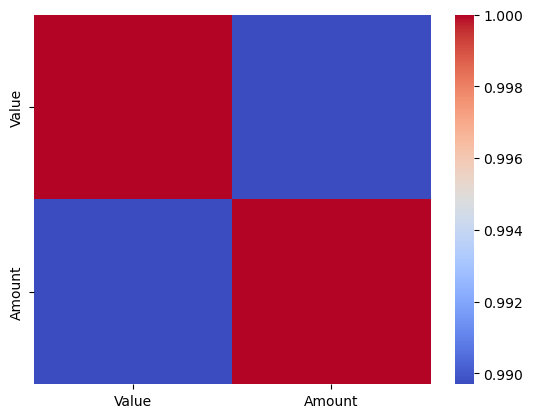

In [29]:
sns.heatmap(df[['Value','Amount']].corr(),cmap='coolwarm')

In [11]:
from scipy.stats import ttest_ind
balanced_fraude = non_fraude.sample(fraude.shape[0])

def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_fraude[col].dropna(), fraude[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

for col in valeurs_financières:
    print(f'{col :-<50} {t_test(col)}')
    

Amount-------------------------------------------- H0 Rejetée
Value--------------------------------------------- H0 Rejetée
